Application Link: https://ml-assignment-3-xcfy49qgcfkwxbbv6mwo8p.streamlit.app/

In [25]:
import json
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # If you're not using 3D plotting, you can remove this
from model import NextWordModel


In [26]:
with open('mappings.json','r') as f:
    data = json.load(f)

word_to_int = data['word_to_int']
int_to_word = data['int_to_word']
vocab = data['vocab']

In [27]:
def load_model(embedding_len,context_len,activation_fn):    
    model = NextWordModel(22582,embedding_len,context_len,1024,activation_fn)
    model.load_state_dict(torch.load(f'{embedding_len}_{context_len}_{activation_fn}.pth',map_location=torch.device('cpu'),weights_only=False))
    
    return model

In [28]:
def extract_embeddings(model, vocab):
    embedding_weights = model.embedding.weight.detach().cpu().numpy()  
    return embedding_weights

In [37]:
def plot_meaningful_embeddings(embeddings, vocab, target_words):
    plt.figure(figsize=(14, 10))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], s=2, alpha=0.6)

    colors = plt.cm.get_cmap('tab10', len(target_words))

    for i, word in enumerate(target_words):
        if word in vocab:
            idx = vocab.index(word)
            offset_x = np.random.uniform(-0.05, 0.05)
            offset_y = np.random.uniform(-0.05, 0.05)
            plt.text(embeddings[idx, 0] + offset_x,
                     embeddings[idx, 1] + offset_y,
                     word, fontsize=10, fontweight='bold', color=colors(i))

    plt.title("t-SNE Visualization of Selected Meaningful Word Embeddings")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid()
    plt.show()

C:\Users\vinny\AppData\Local\Temp\ipykernel_28724\871495326.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{embedding_len}_{context_

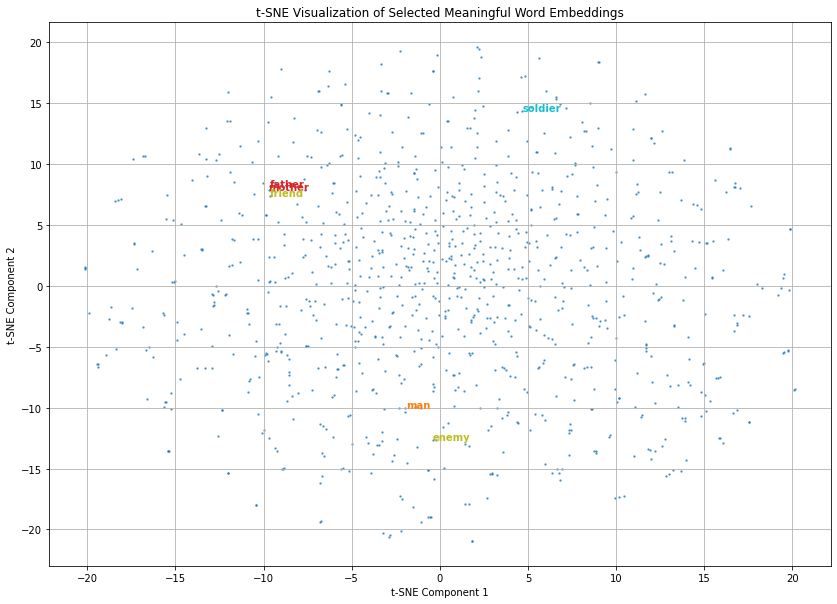

In [29]:
target_words = [
    'king', 'queen', 'man', 'woman', 'brother', 'sister', 'father', 'mother',
    'doctor', 'nurse', 'hero', 'villain', 'apple', 'orange', 'teacher', 'student',
    'friend', 'enemy', 'captain', 'soldier'
]

model = load_model(64, 4, 'relu')
embedding_weights = extract_embeddings(model, vocab)

num_embeddings = 1000  
sampled_embeddings = embedding_weights[:num_embeddings]
sampled_vocab = vocab[:num_embeddings]

tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(sampled_embeddings)

plot_meaningful_embeddings(embeddings_2d, sampled_vocab, target_words)


C:\Users\vinny\AppData\Local\Temp\ipykernel_28724\871495326.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'{embedding_len}_{context_

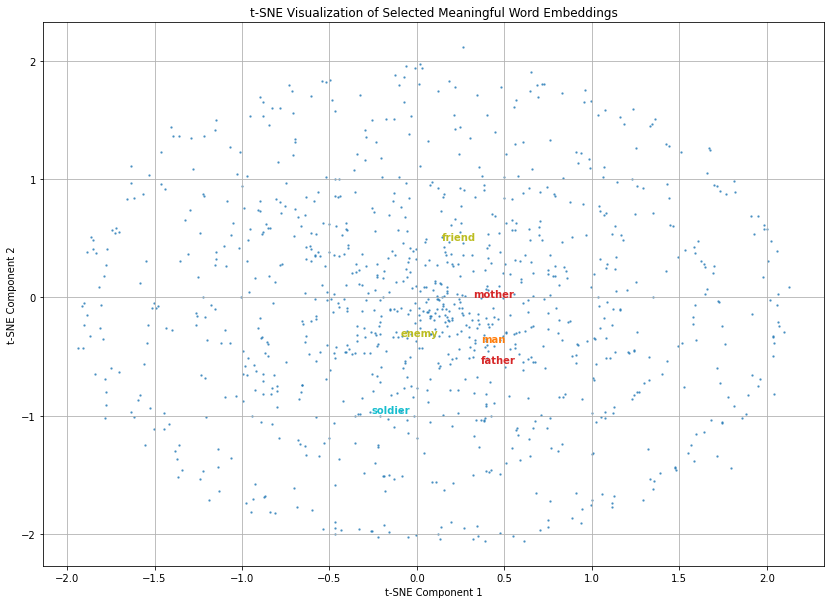

In [31]:
target_words = [
    'king', 'queen', 'man', 'woman', 'brother', 'sister', 'father', 'mother',
    'doctor', 'nurse', 'hero', 'villain', 'apple', 'orange', 'teacher', 'student',
    'friend', 'enemy', 'captain', 'soldier'
]

model = load_model(256, 8, 'tanh')
embedding_weights = extract_embeddings(model, vocab)

num_embeddings = 1000  
sampled_embeddings = embedding_weights[:num_embeddings]
sampled_vocab = vocab[:num_embeddings]

tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(sampled_embeddings)

plot_meaningful_embeddings(embeddings_2d, sampled_vocab, target_words)
